# Exploring the Orderbook

Here, we'll explore different ways of playing with orderbook data

Bids:
╒════╤═════════╤════════════╤═════════╕
│    │   price │   quantity │   total │
╞════╪═════════╪════════════╪═════════╡
│  0 │  0.8591 │     7149.1 │  7149.1 │
├────┼─────────┼────────────┼─────────┤
│  1 │  0.859  │     7340.3 │ 14489.4 │
├────┼─────────┼────────────┼─────────┤
│  2 │  0.8589 │    17829.8 │ 32319.2 │
├────┼─────────┼────────────┼─────────┤
│  3 │  0.8588 │    17633.9 │ 49953.1 │
├────┼─────────┼────────────┼─────────┤
│  4 │  0.8587 │    19393.6 │ 69346.7 │
╘════╧═════════╧════════════╧═════════╛

Asks:
╒════╤═════════╤════════════╤═════════╕
│    │   price │   quantity │   total │
╞════╪═════════╪════════════╪═════════╡
│  0 │  0.8592 │     9026.7 │  9026.7 │
├────┼─────────┼────────────┼─────────┤
│  1 │  0.8593 │    15817.8 │ 24844.5 │
├────┼─────────┼────────────┼─────────┤
│  2 │  0.8594 │    14638.5 │ 39483   │
├────┼─────────┼────────────┼─────────┤
│  3 │  0.8595 │    13221.1 │ 52704.1 │
├────┼─────────┼────────────┼─────────┤
│  4 │  0.8596 │    12138.3

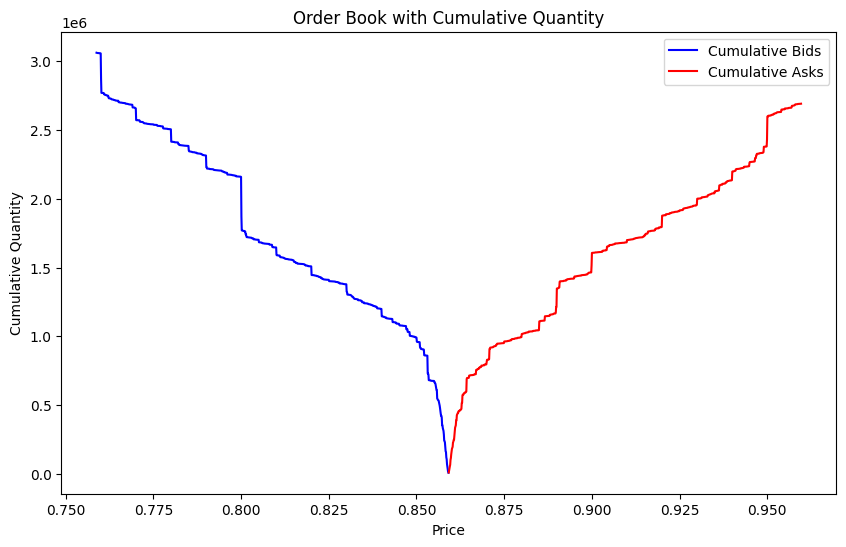

In [33]:
import ccxt
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt


binance = ccxt.binance()

symbol = 'MATIC/USDT'
orderbook = binance.fetch_order_book(symbol, limit=1000) 

# Extract bid and ask data
bid_df = pd.DataFrame(data=orderbook['bids'], columns=["price", "quantity"])
ask_df = pd.DataFrame(data=orderbook['asks'], columns=["price", "quantity"])

# Add a 'total' column to represent the cumulative quantity at each price level
bid_df['total'] = bid_df['quantity'].cumsum()
ask_df['total'] = ask_df['quantity'].cumsum()

# Save bid_df to a CSV file
bid_df.to_csv("bids.csv", index=True)

# Display the bid and ask DataFrames using tabulate
print("Bids:")
print(tabulate(bid_df.head(), headers='keys', tablefmt='fancy_grid'))

print("\nAsks:")
print(tabulate(ask_df.head(), headers='keys', tablefmt='fancy_grid'))

# Visualize the Order Book with Cumulative Quantity
plt.figure(figsize=(10, 6))
plt.plot(bid_df['price'], bid_df['total'], label='Cumulative Bids', color='blue')
plt.plot(ask_df['price'], ask_df['total'], label='Cumulative Asks', color='red')
plt.title('Order Book with Cumulative Quantity')
plt.xlabel('Price')
plt.ylabel('Cumulative Quantity')
plt.legend()
plt.show()

In [34]:
# Display summary statistics for bid prices
bids_summary = bid_df['price'].describe().reset_index() # Describe returns a series, we need a dataframe to use tabulate
print("\nBids Summary:")
print(tabulate(bids_summary, headers='keys', tablefmt='fancy_grid'))

# Display summary statistics for ask prices
asks_summary = ask_df['price'].describe().reset_index()
print("\nAsks Summary:")
print(tabulate(asks_summary, headers='keys', tablefmt='fancy_grid'))


Bids Summary:
╒════╤═════════╤══════════════╕
│    │ index   │        price │
╞════╪═════════╪══════════════╡
│  0 │ count   │ 1000         │
├────┼─────────┼──────────────┤
│  1 │ mean    │    0.809021  │
├────┼─────────┼──────────────┤
│  2 │ std     │    0.0290087 │
├────┼─────────┼──────────────┤
│  3 │ min     │    0.7588    │
├────┼─────────┼──────────────┤
│  4 │ 25%     │    0.783975  │
├────┼─────────┼──────────────┤
│  5 │ 50%     │    0.80905   │
├────┼─────────┼──────────────┤
│  6 │ 75%     │    0.834125  │
├────┼─────────┼──────────────┤
│  7 │ max     │    0.8591    │
╘════╧═════════╧══════════════╛

Asks Summary:
╒════╤═════════╤══════════════╕
│    │ index   │        price │
╞════╪═════════╪══════════════╡
│  0 │ count   │ 1000         │
├────┼─────────┼──────────────┤
│  1 │ mean    │    0.909414  │
├────┼─────────┼──────────────┤
│  2 │ std     │    0.0290219 │
├────┼─────────┼──────────────┤
│  3 │ min     │    0.8592    │
├────┼─────────┼──────────────┤
│  4 │ 25%

## Calculating Metrics from the Orderbook data

In [35]:
# Calculate Bid-Ask Spread
bid_ask_spread = ask_df.iloc[0]['price'] - bid_df.iloc[0]['price']
bid_ask_spread

# Calculate Market Depth
total_bids = bid_df['quantity'].sum()
total_asks = ask_df['quantity'].sum()

print(total_bids)
print(total_asks)

3062959.1
2692028.9
